In [4]:
!curl --header "Host: storage.googleapis.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36 Edg/93.0.961.52" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/3539/44369/Train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1632662061&Signature=ThXRbqWmIN%2FsV1kpurkc%2Fca0SfsVnxGvwUdKe%2FXh4EPWGRJpcYOuaFqj6HdfGKlrlnmabjlLPoXAe%2BOngR2c7nc1QmIQOOe4zUQu7tMkbrtpuejHg4aWkWuzNXwcGCm0cTwxDJi6f1lTVU5%2F6S0g670OK7UUbduUvD8KnpoAWLyeQcfgFPQaNJ7hjD00rQ3caZInIeQVA1kHT3g7tGSuyw39fsJCN7Hat5Ue7MDp9Xuid2HCikGsWf%2FzyTafWgoC2U3U8DsR9e4ODbiD9bGukdocEVQTNd%2BIdbGdrhQdcKB7cqL4wP9r%2FafWa4Auna%2B2rIoE5Ig2cirDMREn%2B7gm4w%3D%3D&response-content-disposition=attachment%3B+filename%3DTrain.zip" -L -o "Train.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2238M  100 2238M    0     0  91.7M      0  0:00:24  0:00:24 --:--:-- 42.2M


In [ ]:
!unzip "/content/Train.zip"

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("/content/Train.csv",nrows=1000000,index_col=["Id"])
df.head()

,Title,Body,Tags
Id,,,
1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [ ]:
print(df.iloc[4][1])

<p>I wrote a servlet which takes the name of a image from the client and displays it to client by converting it to byte array.after displaying the image now when i am trying to print some text i m not able to do so.it simply doesn't print the text even after using <code>PrintWriter</code>.</p>

<p>I am using jboss application server to deploy it.</p>

<p>here is the servlet-<code>Image.java</code>:</p>

<pre><code>package javaserv.image;

import java.io.File;
import java.io.FileInputStream;
import java.io.IOException;
import java.io.PrintWriter;

import javax.imageio.ImageIO;
import javax.servlet.ServletException;
import javax.servlet.ServletOutputStream;
import javax.servlet.http.HttpServlet;
import javax.servlet.http.HttpServletRequest;
import javax.servlet.http.HttpServletResponse;
import javax.swing.ImageIcon;

    public class Image extends HttpServlet {
        private static final long serialVersionUID = 1L;
        public Image() 
    {
        super();
    }


    protected vo

**If the body contains code then it will be present in \<code> tag.**

In [ ]:
df.isnull().any() 

**There are some Null in Tags column**

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().any()

In [ ]:
df.drop_duplicates(["Title","Body","Tags"],inplace=True,ignore_index=True)

In [ ]:
df.shape 

**Nearly there are 56419 duplicates in 1 Million data.bold text**

In [ ]:
df["no_of_tags"] = df["Tags"].apply(lambda x:len(x.split(" ")))

In [ ]:
df.to_parquet("/content/drive/MyDrive/tag_prediction/data.parquet",index=False)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_parquet("/content/drive/MyDrive/tag_prediction/data.parquet")
df.head()

,Title,Body,Tags,no_of_tags
0,a problem in real analysis,"<p>Suppose $T&lt;\infty$, $f:[0,T)\to \mathbb{...",real-analysis,1
1,Are local canonical labellings of a graph ever...,<p>So a canonical labelling of a graph <strong...,graph-theory co.combinatorics graph-algorithms,3
2,Why isn't VirtualBox restoring my saved machin...,"<p>I'm using VirtualBox 3.1.2 (on Windows 7, a...",windows-7 virtualbox virtualization arch-linux,4
3,error: non-lvalue in unary `&' in C++,<p>We are using a macro wrapper to Bind Where ...,c++ macros,2
4,Can't display text after displaying image in s...,<p>I wrote a servlet which takes the name of a...,servlets,1


In [ ]:
df.no_of_tags.value_counts() 

3    135037
2    125388
4     91009
1     64683
5     55673
Name: no_of_tags, dtype: int64

**By this we can say that most of the data has 2 or 3 tags in common.**

In [12]:
x = df[["Title","Body"]]
y = df[["Tags"]]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=df.no_of_tags,random_state=10) 

c_vec = CountVectorizer(tokenizer=lambda x:x.split())
y_train_tag = c_vec.fit_transform(y_train["Tags"])


tag_names = c_vec.get_feature_names()
tag_freq = y_train_tag.sum(axis=0).A1

freq_dict = dict(zip(tag_names,tag_freq))

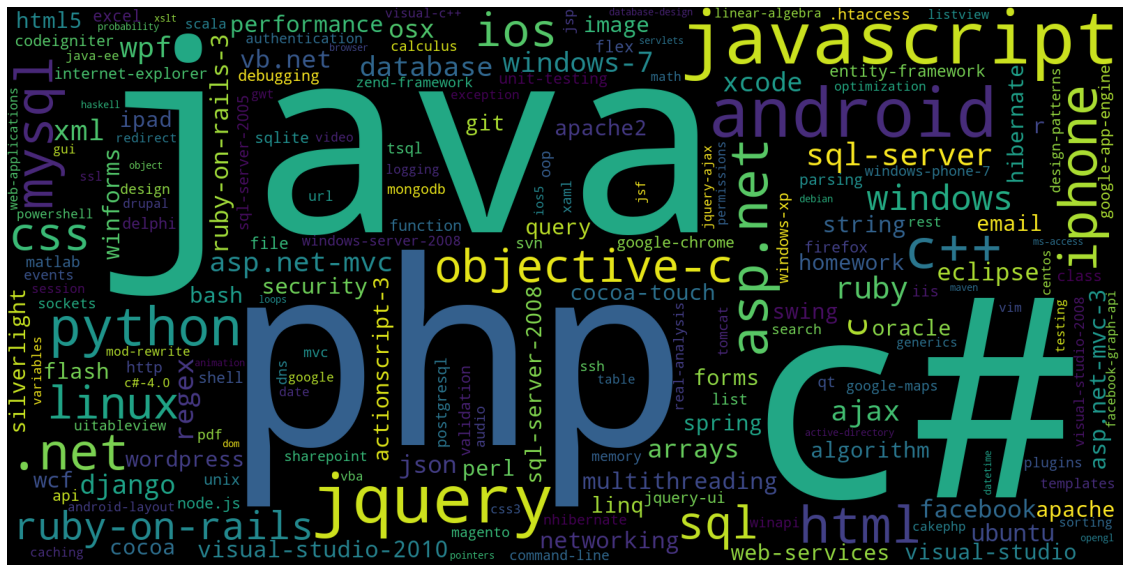

In [13]:
wordcloud = WordCloud(background_color='black',width=1600,height=800,).generate_from_frequencies(freq_dict)

fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Here we can see that some words like Java,PHP,C# are more frequent.**

In [ ]:
for i in range(0,101,5):
  print(f"{i}th percentile is {np.percentile(tag_freq,i)}")  

0th percentile is 1.0
5th percentile is 1.0
10th percentile is 1.0
15th percentile is 1.0
20th percentile is 1.0
25th percentile is 1.0
30th percentile is 2.0
35th percentile is 2.0
40th percentile is 2.0
45th percentile is 3.0
50th percentile is 4.0
55th percentile is 4.0
60th percentile is 5.0
65th percentile is 7.0
70th percentile is 9.0
75th percentile is 12.0
80th percentile is 16.0
85th percentile is 25.0
90th percentile is 44.0
95th percentile is 100.0
100th percentile is 29339.0


In [14]:
for i in range(95,101,1):
  print(f"{i}th percentile is {np.percentile(tag_freq,i)}")  

95th percentile is 100.0
96th percentile is 126.0
97th percentile is 175.0
98th percentile is 278.0
99th percentile is 504.3399999999965
100th percentile is 29339.0


In [15]:
print("Total number of tags are",len(tag_freq)) 

Total number of tags are 28462


In [16]:
freq_dict = sorted(freq_dict.items(),key=lambda x:[x[1],x[0]],reverse=True)
top_tags = [i[0] for i in freq_dict[:100]]

**Here We are taking top 100 frequent tags for Building the model.**

In [17]:
top_tags[:10]

['c#',
 'java',
 'php',
 'javascript',
 'android',
 'jquery',
 'c++',
 'python',
 'iphone',
 'asp.net']

**These are the top 10 tags.**

In [18]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
def rem_html(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', str(data))
    return cleantext

stop_words = set(stopwords.words("english"))
stop_words.remove("not")
stem = SnowballStemmer("english")

In [20]:
from nltk.tokenize import word_tokenize

if not os.path.isfile("/content/drive/MyDrive/tag_prediction/data_new.parquet"):
  new_df = pd.DataFrame(columns=["preprocessed_sentence","contain_code","tags"])
  for idx,row in df.iterrows():
    tags = " ".join([tag for tag in row["Tags"].split() if tag in top_tags])
    
    if not tags: continue
    title = rem_html(row["Title"])
    body = row["Body"]

    if "<code>" in body:
      contain_code = 1    
    else:
      contain_code = 0

    code = str(re.findall(r'<code>(.*?)</code>', body, flags=re.DOTALL))

    body = re.sub('<code>(.*?)</code>', '', body, flags=re.MULTILINE|re.DOTALL)
    body = rem_html(body.encode('utf-8'))

    title=title.encode('utf-8')

    body = str(title)+" "+str(title)+" "+str(title)+" "+str(body)
    body = re.sub(r'[^A-Za-z]+',' ',body)
    words = word_tokenize(str(body.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    body = ' '.join(str(stem.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    tmp_df = pd.DataFrame([[body,contain_code,tags]],columns=["preprocessed_sentence","contain_code","tags"])
    new_df = pd.concat([new_df,tmp_df])

    if (idx+1)%100000 == 0:
      print(idx+1,"rows are processed.")

  new_df.to_parquet("/content/drive/MyDrive/tag_prediction/data_new.parquet",index=False)

else:
  new_df = pd.read_parquet("/content/drive/MyDrive/tag_prediction/data_new.parquet")

In [66]:
def func(x):
  return x.split()

x = new_df[["preprocessed_sentence","contain_code"]]
y = new_df[["tags"]]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)


vec_sent = TfidfVectorizer(min_df=0.00007,ngram_range=(1,2),max_features=50000,tokenizer = func)

x_train_vec = vec_sent.fit_transform(x_train["preprocessed_sentence"])
x_test_vec = vec_sent.transform(x_test["preprocessed_sentence"])


vec_tags = CountVectorizer(tokenizer = func)
y_train_vec = vec_tags.fit_transform(y_train["tags"])
y_test_vec = vec_tags.transform(y_test["tags"])

top_tags = np.array(vec_tags.get_feature_names())

In [69]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_vec, y_train_vec)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=-1)

In [34]:
pred = classifier.predict(x_test_vec)
print("Accuracy :",metrics.accuracy_score(y_test_vec, pred))
print("Hamming loss ",metrics.hamming_loss(y_test_vec,pred))

precision = precision_score(y_test_vec, pred, average='micro')
recall = recall_score(y_test_vec, pred, average='micro')
f1 = f1_score(y_test_vec, pred, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test_vec, pred, average='macro')
recall = recall_score(y_test_vec, pred, average='macro')
f1 = f1_score(y_test_vec, pred, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

# print (metrics.classification_report(y_test_vec, pred))

Accuracy : 0.31129152119351083
Hamming loss  0.010560159284342181
Micro-average quality numbers
Precision: 0.7899, Recall: 0.4495, F1-measure: 0.5730
Macro-average quality numbers
Precision: 0.7147, Recall: 0.4076, F1-measure: 0.5052


In [25]:
def preprocess(title,body):
    title = rem_html(title)

    code = str(re.findall(r'<code>(.*?)</code>', body, flags=re.DOTALL))

    body = re.sub('<code>(.*?)</code>', '', body, flags=re.MULTILINE|re.DOTALL)
    body = rem_html(body.encode('utf-8'))
    title=title.encode('utf-8')

    body = str(title)+" "+str(title)+" "+str(title)+" "+str(body)
    body = re.sub(r'[^A-Za-z]+',' ',body)
    words = word_tokenize(str(body.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    body = ' '.join(str(stem.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    return body

In [73]:
def get_tags(title,body):
  body = preprocess(title,body)
  sent_vec = vec_sent.transform([body])
  prob = classifier.predict_proba(sent_vec)
  lst = [idx for idx,p in enumerate(prob[0]) if p >= 0.3]
  return " ".join(top_tags[lst])

# Saving the Files

In [75]:
import pickle

pickle.dump(vec_sent,open("/content/drive/MyDrive/tag_prediction/vec_sent.pkl",'wb'))
pickle.dump(vec_tags,open("/content/drive/MyDrive/tag_prediction/vec_tags.pkl",'wb'))
pickle.dump(classifier,open("/content/drive/MyDrive/tag_prediction/classifier_basic.pkl",'wb'))

# Loading the files

In [61]:
vec_sent = pickle.load(open("/content/drive/MyDrive/tag_prediction/vec_sent.pkl",'rb'))
vec_tags = pickle.load(open("/content/drive/MyDrive/tag_prediction/vec_tags.pkl",'rb'))
classifier = pickle.load(open("/content/drive/MyDrive/tag_prediction/classifier_basic.pkl",'rb'))